# Students’ Academic Performance Prediction using Data Mining 

#### Import libraries

In [102]:
import numpy as np
import csv
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

Dataset URL - http://archive.ics.uci.edu/ml/datasets/Student+Performance

#### Labels According to G3 - final grade

The others (0–9, 9–15, and 15–20) correspond to  C (poor), B (average), and A (good) class labels, respectively.

###   Dataset Pre-processing


##### files merging

In [32]:
data_path1 = 'student-por.csv'
data_path2 = 'student-mat.csv'

In [33]:
df1 = pd.read_csv(data_path1, sep = ';')
df2 = pd.read_csv(data_path2, sep = ';') 
frames = [df1, df2]
  
result = pd.concat(frames)

In [50]:
result.to_excel('format.xlsx',index=False ,encoding='utf-8')

FileCreateError: [Errno 13] Permission denied: 'format.xlsx'

#### Import dataset

In [98]:
df = pd.read_excel('format.xlsx')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [86]:
#data of column 'G3' categorized into three categories according to above mentioned criteria
bins = [0, 9, 15, 20]
labels = ['C', 'B', 'A']

df['G3'] = pd.cut(df['G3'], bins=bins, labels=labels)

In [87]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,B


#### Exploratory data analysis 

In [88]:
# view dimensions of dataset
df.shape

(1044, 33)

In [89]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,B


In [90]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [91]:
lable_counts = df[['G3']].value_counts()
lable_counts

G3
B     692
C     177
A     122
dtype: int64

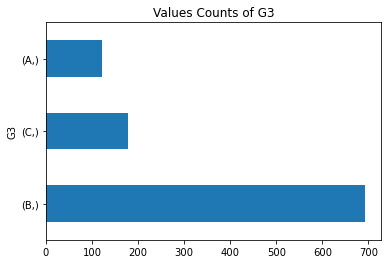

In [92]:
lable_counts.plot(kind = 'barh', title = 'Values Counts of G3')

In [93]:
counts = df[['sex']].value_counts()
counts

sex
F      591
M      453
dtype: int64

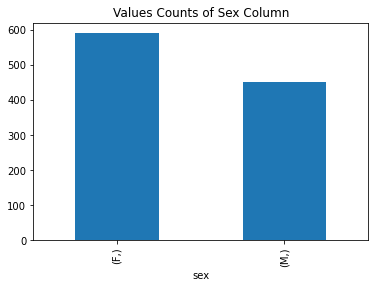

In [94]:
counts.plot(kind = 'bar', title = 'Values Counts of Sex Column')

Above plot shows the number of participated peoples according to their gender.

#### Missing values in variables

In [95]:
# check missing values in variables
df.isnull().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3            53
dtype: int64

####  Declare feature vector and target variable

#### Split data into separate training and test set

In [112]:
labelencoder = LabelEncoder()
encoded_df = df.apply(LabelEncoder().fit_transform)

In [118]:
X = encoded_df.drop(['G3'], axis=1)
y = encoded_df['G3']

In [119]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [120]:
# #lable encoding used for the encoding the data frame values
# labelencoder = LabelEncoder()
# X_train = X_train.apply(labelencoder.fit_transform)
# X_test = X_test.apply(labelencoder.fit_transform)

In [121]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((783, 32), (261, 32))

In [122]:
# check data in X_train
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
248,0,1,1,1,1,1,1,1,2,2,...,0,2,3,1,0,0,4,2,7,6
306,0,1,3,0,1,0,3,4,2,2,...,0,3,1,4,2,3,0,6,13,13
679,0,1,0,1,0,1,4,4,1,3,...,0,4,3,1,2,3,4,0,7,8
371,0,0,3,1,0,1,2,2,2,2,...,1,3,2,4,1,3,4,2,8,7
425,1,0,0,0,0,1,1,1,0,3,...,1,3,0,2,0,0,1,6,8,7


#### Feature Selection

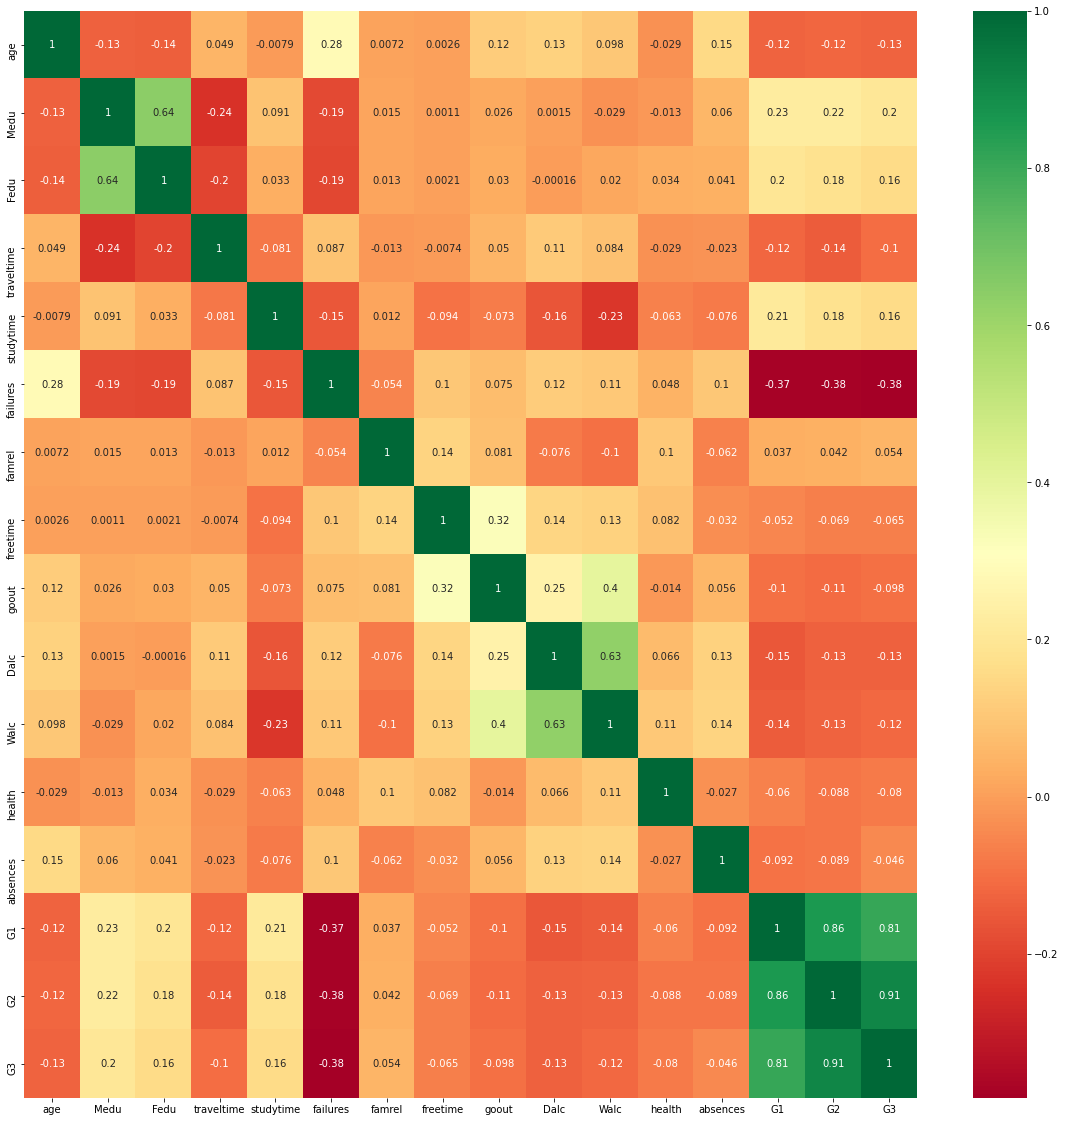

In [100]:
df_ = pd.read_excel('format.xlsx')
corrmat = df_.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or 
relevant is the feature towards your output variable.

[0.01513781 0.02129094 0.03278585 0.01605623 0.02058485 0.01166248
 0.0280097  0.02968588 0.0292762  0.02665863 0.02960439 0.02071194
 0.02326512 0.02613341 0.01983191 0.01061794 0.02074114 0.02822397
 0.01975006 0.01640454 0.00762824 0.01513198 0.02050136 0.02913402
 0.0303185  0.03274197 0.02158723 0.02927501 0.03169706 0.06275468
 0.10365502 0.16914194]


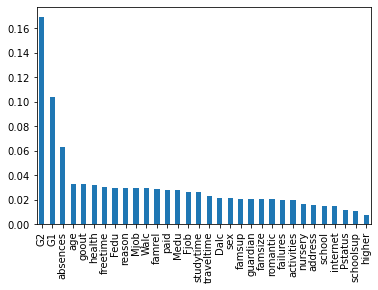

<Figure size 576x144 with 0 Axes>

<Figure size 576x144 with 0 Axes>

In [131]:
X_ = encoded_df.iloc[:,0:32]  #independent columns
y_ = encoded_df.iloc[:,-1]    #target column i.e G3

#sklearn built in ensemble method extratreesclassifire here used for the univariant selection
model = ExtraTreesClassifier()
model.fit(X_,y_)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(32).plot(kind='bar', )
plt.show()
plt.figure(figsize=(8, 2))

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of 
different statistical tests to select a specific number of features.

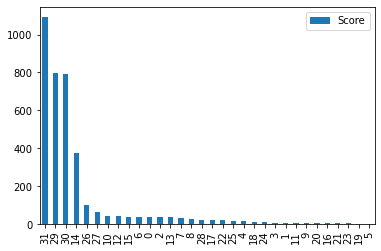

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_ = encoded_df.iloc[:,0:32]  #independent columns
y_ = encoded_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(32,'Score').plot(kind='bar', )
# print(featureScores.nlargest(32,'Score'))  #print 10 best features

In [139]:
# use this to check above graph
c = 0
for col in df.columns:    
    print(str(c)+ ' => ' +col)
    c = c + 1

0 => school
1 => sex
2 => age
3 => address
4 => famsize
5 => Pstatus
6 => Medu
7 => Fedu
8 => Mjob
9 => Fjob
10 => reason
11 => guardian
12 => traveltime
13 => studytime
14 => failures
15 => schoolsup
16 => famsup
17 => paid
18 => activities
19 => nursery
20 => higher
21 => internet
22 => romantic
23 => famrel
24 => freetime
25 => goout
26 => Dalc
27 => Walc
28 => health
29 => absences
30 => G1
31 => G2
32 => G3


In [145]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
307,0,1,2,1,0,1,3,1,3,2,...,1,4,3,3,2,3,4,0,2,2
884,0,1,1,1,1,1,1,1,2,2,...,0,2,3,1,0,0,4,10,17,14
477,1,1,0,1,0,1,3,3,3,3,...,0,3,2,2,1,3,2,3,3,1
849,0,0,1,1,1,1,4,4,4,4,...,0,3,4,1,0,1,2,0,17,16
601,1,0,3,1,0,1,2,2,2,2,...,1,0,2,0,0,0,1,24,16,15


In [146]:
X_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
773,0,1,1,1,0,2,4,4,2,3,...,0,2,3,3,0,3,4,9,4,2
280,0,1,3,0,1,2,3,3,3,4,...,2,3,2,2,0,2,4,20,0,14
629,1,0,2,0,0,2,1,2,3,3,...,0,2,4,4,0,2,0,16,13,13
318,0,0,3,0,0,0,3,2,3,4,...,2,3,0,0,0,0,4,7,2,14
1008,1,1,3,1,1,2,1,1,3,4,...,2,2,2,1,0,1,2,16,0,1


### Try Different Machine Learning algorithms

#### 1. Decision Tree Classifier with criterion gini index 

In [147]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

#### Predict the Test set results with criterion gini index

In [148]:
y_pred_gini = clf_gini.predict(X_test)
# y_pred_gini

#### Check accuracy score with criterion gini index

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Decision Tree Classifier accuracy score with criterion gini index: {0:0.2f}%'. format(accuracy_score(y_test, y_pred_gini)*100))

Decision Tree Classifier accuracy score with criterion gini index: 80.92%


Check for overfitting and underfitting

In [150]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9553
Test set score: 0.8092


Accurcy of the Decision Tree Classifier

In [151]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           A       0.76      0.92      0.83        48
           B       0.88      0.85      0.86       170
           C       0.60      0.56      0.58        43
          G3       0.00      0.00      0.00         1

    accuracy                           0.81       262
   macro avg       0.56      0.58      0.57       262
weighted avg       0.81      0.81      0.81       262



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
from sklearn.ensemble import RandomForestClassifier
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25, random_state = 42)
model=RandomForestClassifier(random_state=1)
labelencoder = LabelEncoder()
X_train1 = X_train1.apply(labelencoder.fit_transform)
X_test1 = X_test1.apply(labelencoder.fit_transform)
model.fit(X_train1, y_train1)
print('Validation Accuracy with all 32 features :',model.score(X_test1,y_test1))

Validation Accuracy with all 32 features : 0.8091603053435115


#### Visualize decision-trees

In [21]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,   
                                special_characters=True,
                                filled=True)

In [888]:
deci_tree=graphviz.Source(dot_data,format='jpg')
deci_tree.save(filename='deci_tree.jpg')
deci_tree.render(filename='deci_tree')


'deci_tree.jpg'

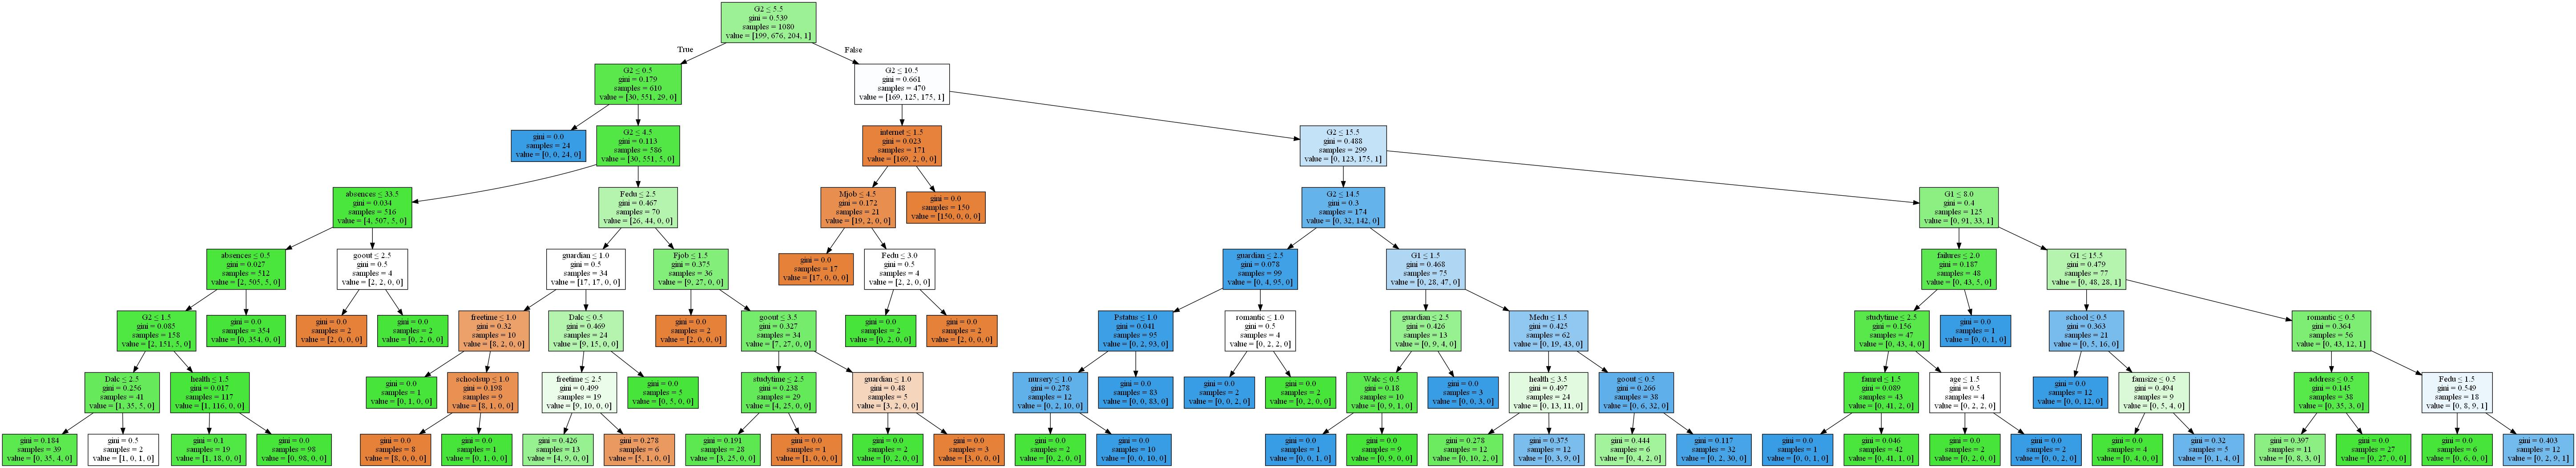

In [889]:
from IPython.display import Image
Image(filename='deci_tree.jpg', width=1000)

In [70]:
X1 = df.drop(['G3'], axis=1)
X1=X1.apply(labelencoder.fit_transform)
Y1 = df['G3']

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import VotingClassifier
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', svm.SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier()))
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hard Voting Score  0


## Changing the max_depth

In [898]:
train_depth_accuracy=[]
test_depth_accuracy=[]
for depth in range(1,10):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    # fit the model
    clf_gini.fit(X_train, y_train)
    y_pred_test_gini = clf_gini.predict(X_test)   
    test_depth_accuracy.append(accuracy_score(y_test, y_pred_test_gini))
    
    y_pred_train_gini = clf_gini.predict(X_train)   
    train_depth_accuracy.append(accuracy_score(y_train, y_pred_train_gini))


In [899]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_depth_accuracy,'test_acc':test_depth_accuracy})

In [900]:
frame.head()

,max_depth,train_acc,test_acc
0,1,0.672222,0.614958
1,2,0.850926,0.806094
2,3,0.904630,0.806094
3,4,0.904630,0.814404
4,5,0.931481,0.839335


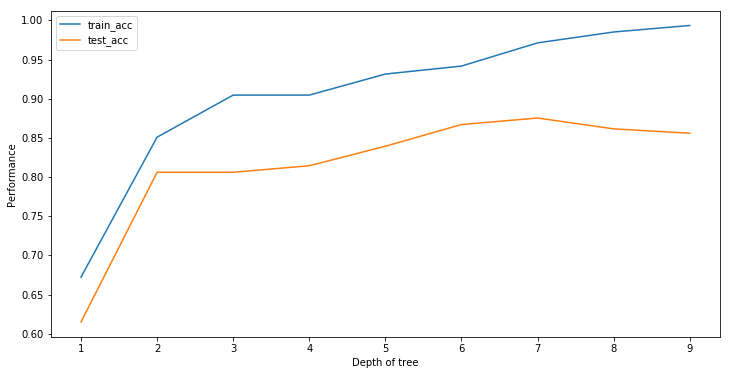

In [901]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['test_acc'])
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()